In [19]:
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (10,7)
df = pd.read_csv("CREXpita.csv", delimiter=',', dtype={'time':'str','unix_time':'str','ihwp':np.int32, 'RTPPITA1CNT':np.float64, 'RTPPITA1CNTSET':np.float64, 'RTPPITA2CNT':np.float64, 'RTPPITA2CNTSET':np.float64}, parse_dates=['time','unix_time'])
df['ihwp_out'] = 1-df['ihwp'] 
df['pita'] = (df['RTPPITA1CNT']-df['RTPPITA1CNTSET']+ df['RTPPITA2CNT']-df['RTPPITA2CNTSET'])/(2.0)

In [21]:
nIn = df.query("ihwp == 1 & pita != 0")['ihwp'].sum()
pita_in = df.query("ihwp == 1 & pita != 0")['pita'].sum()
nOut = df.query("ihwp_out == 1 & pita != 0")['ihwp_out'].sum()
pita_out = df.query("ihwp_out == 1 & pita != 0")['pita'].sum()

print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)

print("Average in retardance", pita_in/nIn*3.1415927/2/12670.)
print("Average out retardance", pita_out/nOut*3.1415927/2/12670.)




Average in voltage -41.77955790440983
Average out voltage -69.17582778182229
Average in retardance -0.005179729839057664
Average out retardance -0.008576253969054069


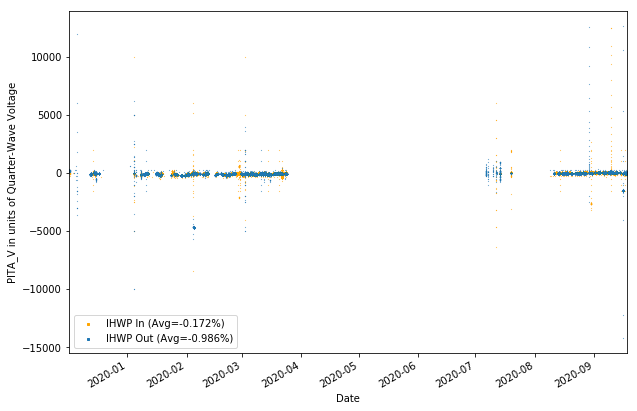

In [22]:
df_new = df[df['pita'] != 0]
df_new.shape
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
fig, ax = plt.subplots()
#ax2 = ax.twinx()

df_in.plot(x='time',y='pita',style=',', color='orange', ax=ax, label='IHWP In (Avg=-0.172%)',marker='s', markersize=12./fig.dpi)
df_out.plot(style=',',x='time',y='pita', ax=ax, label='IHWP Out (Avg=-0.986%)',marker='s',markersize=12./fig.dpi)
plt.ylabel('PITA_V in units of Quarter-Wave Voltage')
plt.xlabel('Date')
plt.legend(markerscale=12)
#plt.figure(figsize=(10,7))
fig1=plt.gcf()
fig1.savefig('../pitavst.png',bbox_inches='tight')
plt.show()


#print(nIn+nOut)